# Machine Learning Tutorial: part 2

https://www.youtube.com/watch?v=4PXAztQtoTg&list=WL&index=3  

## Training and testing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# need to shuffle and split data

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=123)

train_y

array([1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0,
       1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1,
       1, 2, 2, 1, 0, 1, 1, 2, 2])

In [5]:
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [30.66666667 40.         29.33333333]
Test: [36.         26.66666667 37.33333333]


In [6]:
#splitting with the same proportions using stratify=y

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, 
                                                    random_state=123, stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


In [7]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print('Accuracy', np.sum(pred_y == test_y) / float(len(test_y)))

Accuracy 0.96


In [8]:
np.where(pred_y != test_y)[0] #returns a tuple with one entry so indexing it using [0]

array([44, 49, 60], dtype=int64)

In [9]:
incorect = test_X[np.where(pred_y != test_y)[0],]
incorect

array([[5.9, 3.2, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [4.9, 2.5, 4.5, 1.7]])

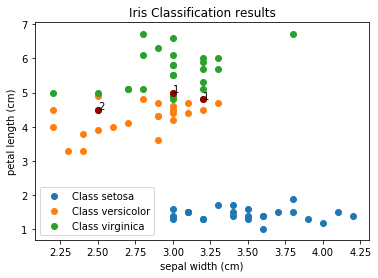

In [30]:
for n in np.unique(test_y):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], label="Class %s" % str(iris.target_names[n]))
    
plt.scatter(incorect[:, 1], incorect[:, 2], color='darkred', marker='o')

n = test_y[np.where(pred_y != test_y)[0]]
for i, txt in enumerate(n):
    plt.annotate(txt, (incorect[:, 1][i], incorect[:, 2][i]))


plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.legend(loc=3,)
plt.title("Iris Classification results")
plt.show()

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')